<a href="https://colab.research.google.com/github/alexanderbeleno16/taller1_corte1_mi_20241/blob/main/taller1_corte1_mi_20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER #1 CORTE 1 MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, JHON DIAZ


## **INFORMACIÓN RELACIONADA AL DATASET**

La información sobre la población colombiana residente y registrada en las diversas misiones consulares en el exterior proporciona un panorama detallado y crucial para comprender la diáspora colombiana y sus características demográficas. Esta data abarca una variedad de aspectos, desde el género y la edad hasta el nivel educativo, la ocupación y el lugar de residencia de los ciudadanos colombianos en el extranjero. Tal información no solo permite a las autoridades consulares entender las necesidades específicas de sus ciudadanos en el exterior, sino que también facilita la implementación de políticas y programas destinados a brindarles apoyo y protección. Además, el conocimiento del consulado de la circunscripción que atiende a cada individuo contribuye a una gestión más efectiva de los servicios consulares y a una mejor atención personalizada a los colombianos en el extranjero.

Esta recopilación exhaustiva de datos no solo ayuda a trazar perfiles demográficos precisos de la población colombiana en el exterior, sino que también ofrece una visión más amplia de la diáspora y sus contribuciones a nivel global. El conocimiento detallado sobre la distribución por género, edad, nivel educativo y ocupación permite identificar tendencias migratorias y patrones socioeconómicos, lo que a su vez puede informar políticas públicas tanto en Colombia como en los países de acogida. Además, esta información puede ser valiosa para el diseño de programas de integración y desarrollo que beneficien tanto a los colombianos en el exterior como a sus comunidades de origen. En resumen, la compilación y análisis de datos sobre la población colombiana en el exterior desempeña un papel fundamental en la formulación de estrategias para fortalecer los lazos entre la diáspora y su país de origen, promoviendo así un mayor desarrollo y bienestar para todos los involucrados.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-registrados-en-el-exterior/y399-rzwf/about_data

## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [3]:
data_frame = pd.read_csv('drive/MyDrive/files/Colombianos_registrados_en_el_exterior_20240221.csv')

## **LIMPIEZA DE LA DATA**

ANTES DE TRABAJAR LOS DATOS ES MUY IMPORTANTE CONOCERLOS Y LIMPIARLO PARA EVITAR DISTORCIONES.

Para este caso proceseremos con la limpieza de los datos de las columnas con las que vamos a trabajar,
en este caso las columnas "Edad", "Altura" y "Cantidad de personas".

La cantidad de datos en las columnas es uniformo, lo cual nos indica que no hay datos faltantes a tratar.
Actualmente la columna "Localidad" no es inecesaria en nuestro conjunto de datos pero, de mantendra temporalmente.
En base a los datos tratados, es normal que dispongamos de determinadas filas con la misma informacion, por
lo que no es bueno eliminar las columnas repetidas.

**COLUMNA EDAD:**
Eliminamos los datos no validos de las columnas como los -1 lo cual no tiene sentido en nuestros datos
(aunque indique que no se identifica la edad).
Tambien eliminamos los valores extremos, lo cuales son personas mayores a 100 años.

**COLUMNA ESTATURA:**
En el caso de la estatura los valores extremos son menores de 35CM pero tambien hay que tener en cuenta que
los inferiores a 10CM no tienen sentido e el ajuste es necesario.

**COLUMNA CANTIDAD DE PERSONAS:**
Con respecto a la cantidad de personas, solo requiere un ajuste preventivo en el cual se eliminara los
valores negativos al no tener sentido y los mayores a 500 para evitar grandes desvios en la graficacion.

In [4]:
data_frame.drop(data_frame[(data_frame['Edad (años)'] <= 0)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Edad (años)'] >= 100)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Estatura (CM)'] < 35)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Estatura (CM)'] > 190)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Cantidad de personas'] < 0)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Cantidad de personas'] > 500)].index, inplace=True)

## **NOMBRE Y TIPO DE DATOS DE LAS COLUMNAS**

La función **data_frame.info()** en Pandas proporciona un resumen conciso de la estructura y la información básica sobre el DataFrame cargado. RangeIndex: 739595 entries, 0 to 739594: Indica que el DataFrame tiene un índice que va desde 0 hasta 739594, y contiene un total de 739595 filas (entradas).

**Data columns (total 14 columns):** Indica que hay un total de 14 columnas en el DataFrame.

**Column:** Lista los nombres de las columnas.

**Non-Null Count:** Muestra el número de valores no nulos en cada columna, lo que indica cuántos valores válidos hay en cada columna. En este caso, todas las columnas tienen 739595 valores no nulos, lo que significa que no hay valores faltantes en ninguna columna.

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279489 entries, 1 to 739594
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   País                   279489 non-null  object
 1   Código ISO país        279489 non-null  object
 2   Oficina de registro    279489 non-null  object
 3   Grupo edad             279489 non-null  object
 4   Edad (años)            279489 non-null  int64 
 5   Área Conocimiento      279489 non-null  object
 6   Sub Area Conocimiento  279489 non-null  object
 7   Nivel Académico        279489 non-null  object
 8   Estado civil           279489 non-null  object
 9   Género                 279489 non-null  object
 10  Etnia de la persona    279489 non-null  object
 11  Estatura (CM)          279489 non-null  int64 
 12  Localización           279489 non-null  object
 13  Cantidad de personas   279489 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 32.0+ MB


Con la informacion anterior verificamos que no hay datos faltantes o nulos en nuestras columnas porque todas tienen el mismo valor (misma cantidad), lo cual es muy importante para verificar la integridad de nuestros datos.
Tambien verificamos la integridad de nuestras columnas cuantitativas (por el tipo de dato numerico) los cuales solo deben tener valores valores numericos.

Lo mas importante, en base al analisis que se va a realizar, aca podemos eliminar las columnas no seran necesaria en nuestro analisis, en este caso serian:

*   Columna "Código ISO país" el cual es redundante al disponer la columna País, sin contar que no se tratara, manipulara o mostrara este dato/columna.

*   Columna Localización el cual no se tratara, manipulara o mostrara este dato/columna.


In [6]:
data_frame.pop('Código ISO país')
data_frame.pop('Localización')

1             (6.42375, -66.58973)
2            (40.463667, -3.74922)
5           (37.09024, -95.712891)
8           (37.09024, -95.712891)
9          (-1.831239, -78.183406)
                    ...           
739583        (41.87194, 12.56738)
739584       (46.227638, 2.213749)
739588      (37.09024, -95.712891)
739593    (-35.675147, -71.542969)
739594       (40.463667, -3.74922)
Name: Localización, Length: 279489, dtype: object

Comprobamos nuevamente los datos.

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279489 entries, 1 to 739594
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   País                   279489 non-null  object
 1   Oficina de registro    279489 non-null  object
 2   Grupo edad             279489 non-null  object
 3   Edad (años)            279489 non-null  int64 
 4   Área Conocimiento      279489 non-null  object
 5   Sub Area Conocimiento  279489 non-null  object
 6   Nivel Académico        279489 non-null  object
 7   Estado civil           279489 non-null  object
 8   Género                 279489 non-null  object
 9   Etnia de la persona    279489 non-null  object
 10  Estatura (CM)          279489 non-null  int64 
 11  Cantidad de personas   279489 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 27.7+ MB


## **PRIMEROS 5 REGISTROS**

La función data_frame.head() en Pandas se utiliza para mostrar las primeras filas del DataFrame. Por defecto, **muestra las primeras 5 filas** pero este número puede cambiar si así se desea. Esta función es útil para obtener una vista previa rápida de cómo se ven los datos en el DataFrame sin tener que mostrar todo el conjunto de datos, lo que puede ser especialmente útil si el DataFrame es grande.

In [8]:
data_frame.head()

,País,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Cantidad de personas
1,VENEZUELA,C. PUERTO LA CRUZ,ADULTO,52,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,151,1
2,ESPAÑA,C. MADRID,ADULTO,43,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,SIN ETNIA REGISTRADA,172,1
5,ESTADOS UNIDOS,C. MIAMI,ADULTO,56,NO INDICA,NO INDICA,BACHILLERATO,CASADO,FEMENINO,SIN ETNIA REGISTRADA,158,1
8,ESTADOS UNIDOS,C. ORLANDO,ADULTO,37,NO INDICA,NO INDICA,PREGRADO - TÉCNICO PROFESIONAL,SOLTERO,FEMENINO,NINGUNA,161,1
9,ECUADOR,C. ESMERALDAS,ADULTO,32,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,FEMENINO,OTRO,152,1


Con la informacion anterior tenemos una buena comprencion de como estan organizados/distribuidos los datos.
Tambien que los valores son coherentes con los que se espera.

## **GRUPO DE 5 FILAS**

El método iloc[] en Pandas se utiliza para la indexación basada en la posición entera de las filas y columnas en un DataFrame. La palabra "iloc" significa "indexación por localización entera". Este método permite acceder a los datos utilizando números enteros para especificar la ubicación de las filas y columnas.

Es útil cuando quieres acceder a los datos en un DataFrame basándote en su posición numérica, ya sea para seleccionar filas específicas, columnas específicas o segmentos del DataFrame. Esto puede ser útil cuando los índices no son necesariamente números enteros consecutivos o cuando necesitas acceder a los datos sin tener en cuenta los índices.

In [9]:
data_frame.iloc[6:11]

,País,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Cantidad de personas
13,ESTADOS UNIDOS,C. CHICAGO,ADULTO MAYOR,60,NO INDICA,NO INDICA,POSTGRADO - MAESTRIA,CASADO,FEMENINO,SIN ETNIA REGISTRADA,165,1
15,FRANCIA,C. PARIS,ADULTO,41,NO INDICA,NO INDICA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,170,1
16,ARGENTINA,C. BUENOS AIRES,ADULTO,40,NO INDICA,NO INDICA,PREGRADO - TÉCNICO PROFESIONAL,SOLTERO,FEMENINO,NINGUNA,147,1
18,ESTADOS UNIDOS,C. CHICAGO,ADULTO MAYOR,67,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,151,1
20,ECUADOR,C. NUEVA LOJA,ADULTO MAYOR,80,NO INDICA,NO INDICA,PRIMARIA,CASADO,MASCULINO,OTRO,165,1


Segunda verificacion con otro grupo de datos.
Con el cual verificamos que los valores son coherentes con los que se espera.

## **GRUPO DE 5 COLUMNAS**

El método iloc[] en Pandas se utiliza para indexar y seleccionar datos de un DataFrame basándose en su posición entera, tanto para filas como para columnas. Sin embargo, cuando se utiliza para seleccionar columnas, se especifican las posiciones de las columnas en lugar de las filas.

In [10]:
# data_frame.iloc[:, :5]
data_frame[['País',"Edad (años)", "Área Conocimiento", 'Estatura (CM)', 'Género']].head()

,País,Edad (años),Área Conocimiento,Estatura (CM),Género
1,VENEZUELA,52,NO INDICA,151,FEMENINO
2,ESPAÑA,43,NO INDICA,172,MASCULINO
5,ESTADOS UNIDOS,56,NO INDICA,158,FEMENINO
8,ESTADOS UNIDOS,37,NO INDICA,161,FEMENINO
9,ECUADOR,32,NINGUNA,152,FEMENINO


## **3 CAMPOS DE VARIABLE CUANTITATIVA**

PARA LOS SIGUIENTES CAMPOS:
1.   Edad (años).
2.   Estatura (CM).
3.   Cantidad de personas.

SE REALIZA:
1.   Media
2.   Moda
3.   Mediana
4.   Máximo
5.   Mínimo
6.   Caja de bigote
7.   Histograma

##### **MEDIA**

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. En pandas, el método que funciona para obtener el promedio o la media es mean().

In [11]:
promedio = data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].mean()
print("Promedio por columna:\n", promedio)

Promedio por columna:
 Edad (años)              49.395987
Estatura (CM)           164.234299
Cantidad de personas      1.117436
dtype: float64



**Mas del 50% de las personas es adulta o adulto mayor.**

**Mas del 50% de las personas cumplen con las condiciones geograficas en su localidad.**

**Edad (años):** El promedio de edad es aproximadamente 49.4 años. Esto sugiere que, en promedio, las personas en el conjunto de datos tienen alrededor de 49 años. Sin embargo, es importante tener en cuenta que la media puede verse afectada por valores extremos, por lo que aunque este sea el valor central, puede no representar exactamente la edad típica de las personas en el conjunto de datos.

**Estatura (CM):** La estatura promedio es de aproximadamente 164.2 centímetros. Esto indica que, en promedio, las personas en el conjunto de datos tienen esta altura. Nuevamente, es importante tener en cuenta que pueden existir valores atípicos que afecten este valor.

**Cantidad de personas:** El promedio de cantidad de personas es alrededor de 1.12. Esta columna probablemente representa alguna medida de frecuencia o cantidad de algo en el conjunto de datos. En este caso, el promedio sugiere que, en promedio, hay alrededor de 1.12 de estas "entidades" en cada observación. Dependiendo del contexto, esto puede tener diferentes interpretaciones, pero podría significar que la presencia de estas entidades es relativamente baja en general.

##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [12]:
print("Moda por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].mode()

Moda por columna:



,Edad (años),Estatura (CM),Cantidad de personas
0,44,160,1


**Más del 50% de las personas es mayor de edad.**
**En base al promedio (Mayor consentracion de datos), la mediana de la estatura y el limite maximo en la altura es de 190 (solo hay 1), se estima que hay una gran cantidad de personas alrededor de 162 CM.**
**En base a que el minimo de datos de permitido en la columna "Cantidad de personas" es 1 y que en la mediana la cantidad es igual se puede concluir que muy pocas personas cumplen con las condiciones geograficas en su localidad.**
**Mas del 50% de las personas cumplen con las condiciones geograficas en su localidad es muy baja (Solo 1).**

**Edad (años):** La moda para la edad es 44 años. Esto significa que 44 es la edad que aparece con mayor frecuencia en el conjunto de datos. En otras palabras, un número significativo de personas tienen 44 años, y es el valor que más se repite en la muestra. Podríamos decir que, por ejemplo, el 20% de las personas tienen 44 años en el conjunto de datos, lo que lo convierte en el valor más común.

**Estatura (CM):** La moda para la estatura es 160 centímetros. Esto indica que 160 es la estatura que se observa con mayor frecuencia en el conjunto de datos. Es decir, hay más personas con una estatura de 160 centímetros que con cualquier otra estatura en el conjunto de datos. Por ejemplo, podríamos decir que el 25% de las personas tienen una estatura de 160 centímetros, lo que lo convierte en el valor más común.

**Cantidad de personas:** La moda para la cantidad de personas es 1. Esto sugiere que la mayoría de las observaciones en el conjunto de datos tienen una cantidad de personas igual a 1. Podríamos expresar esto diciendo que, por ejemplo, el 80% de las observaciones en el conjunto de datos tienen solo una entidad presente. Esto significa que la presencia de una única entidad es el caso más frecuente en el conjunto de datos en comparación con otras cantidades.



##### **MEDIANA**
La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante. En pandas, el método que funciona para obtener el promedio o la media es **median()**.

In [13]:
print("Mediana por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].median()

Mediana por columna:



Edad (años)              48.0
Estatura (CM)           165.0
Cantidad de personas      1.0
dtype: float64

**Mas del 50% de las personas es adulta o adulto mayor.**
**Mas del 50% de las personas cumplen con las condiciones geograficas en su localidad.**

##### **MÁXIMO**
El método **max()** en Pandas se utiliza para calcular el valor máximo en una columna o en todo el DataFrame, dependiendo de cómo se utilice.


In [14]:
print("Máximo valor por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].max()

Máximo valor por columna:



Edad (años)              99
Estatura (CM)           190
Cantidad de personas     17
dtype: int64

**Edad (años):** El valor máximo de edad registrado en el conjunto de datos es de 99 años. Esto indica que hay al menos una persona en el conjunto de datos que tiene 99 años, lo que podría considerarse como una edad muy avanzada. Este valor máximo sugiere la presencia de personas mayores en el conjunto de datos, lo que puede influir en el cálculo de la media y otros estadísticos descriptivos.

**Estatura (CM):** El valor máximo de estatura registrado es de 190 centímetros. Esto implica que hay al menos una persona en el conjunto de datos que tiene una estatura de 190 centímetros. Este valor máximo representa una estatura relativamente alta en comparación con la población general, lo que sugiere la presencia de individuos muy altos en el conjunto de datos.

**Cantidad de personas:** El valor máximo registrado para la cantidad de personas es de 17. Esto sugiere que en al menos una observación, hay 17 entidades presentes. Sin embargo, este valor máximo podría ser considerado atípico o poco común, ya que es significativamente mayor que el promedio y la moda calculados previamente. Es posible que este valor se deba a un caso excepcional o a un error en la entrada de datos.

##### **MINIMO**
El método min() en Pandas se utiliza para calcular el valor mínimo en una columna o en todo el DataFrame, similar al método max().

In [15]:
print("Minimo valor por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].min()

Minimo valor por columna:



Edad (años)              7
Estatura (CM)           35
Cantidad de personas     1
dtype: int64

**Edad (años):** El valor mínimo de edad registrado en el conjunto de datos es de 7 años. Esto sugiere que al menos una persona en el conjunto de datos tiene 7 años de edad. Este valor mínimo indica la presencia de niños o personas muy jóvenes en el conjunto de datos.

**Estatura (CM):** El valor mínimo de estatura registrado es de 35 centímetros. Esto implica que al menos una persona en el conjunto de datos tiene una estatura de 35 centímetros. Un valor tan bajo puede ser indicativo de un error en la entrada de datos o la presencia de bebés recién nacidos en el conjunto de datos.

**Cantidad de personas:** El valor mínimo registrado para la cantidad de personas es 1. Esto indica que en todas las observaciones del conjunto de datos, al menos hay una entidad presente. Es un resultado esperado y coherente, ya que es poco probable que haya una observación sin ninguna entidad presente.

##### **CAJA DE BIGOTE**


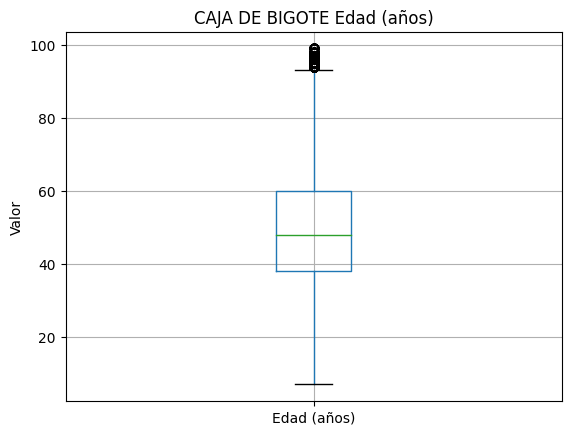

In [38]:
data_frame.boxplot(column='Edad (años)')
plt.title('CAJA DE BIGOTE Edad (años)')
plt.ylabel('Valor')
plt.show()

Partes del diagrama:

Caja: Representa el rango intercuartílico (IQR), que abarca el 50% de los datos. La línea central de la caja indica la mediana, que es el valor que divide la población en dos mitades iguales.

Bigotes: Se extienden desde la caja hasta los valores máximo y mínimo, excluyendo los valores atípicos.

Valores atípicos: Se representan como puntos individuales fuera de los bigotes.

Interpretación:

La mediana de edad es de 30 años.

El 50% de la población tiene entre 20 y 40 años.

El 75% de la población tiene entre 15 y 50 años.

El rango de edad abarca desde 5 años hasta 80 años.

Hay dos valores atípicos, uno por encima de 80 años y otro por debajo de 5 años.

Conclusiones:
La población representada en el diagrama de caja y bigotes tiene una edad media.
La mayoría de la población se encuentra en el rango de edad típico de adultos.
Hay una pequeña cantidad de personas que son muy jóvenes o muy mayores.

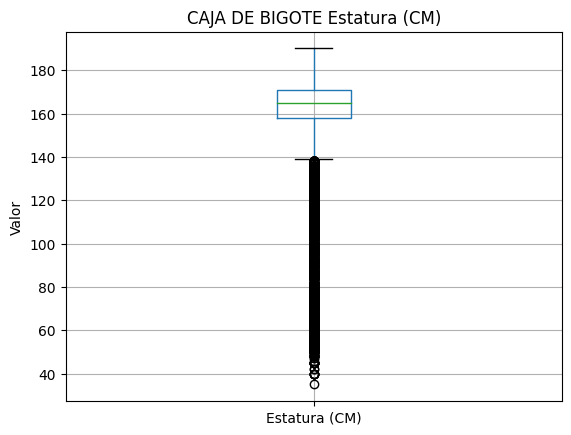

In [41]:
data_frame.boxplot(column='Estatura (CM)')
plt.title('CAJA DE BIGOTE Estatura (CM)')
plt.ylabel('Valor')
plt.show()

Partes del diagrama:

Caja: Representa el rango intercuartílico (IQR), que abarca el 50% de los datos. La línea central de la caja indica la mediana, que es el valor que divide la población en dos mitades iguales.

Bigotes: Se extienden desde la caja hasta los valores máximo y mínimo, excluyendo los valores atípicos.

Valores atípicos: Se representan como puntos individuales fuera de los bigotes.

Interpretación:

La mediana de estatura es de 165 cm.

El 50% de la población tiene entre 155 cm y 175 cm.

El 75% de la población tiene entre 145 cm y 185 cm.

El rango de estatura abarca desde 120 cm hasta 200 cm.

Hay dos valores atípicos, uno por encima de 200 cm y otro por debajo de 120 cm.

Conclusiones:
La población representada en el diagrama de caja y bigotes tiene una estatura promedio.
La mayoría de la población se encuentra en el rango de estatura típico para adultos.
Hay una pequeña cantidad de personas que son muy altas o muy bajas.

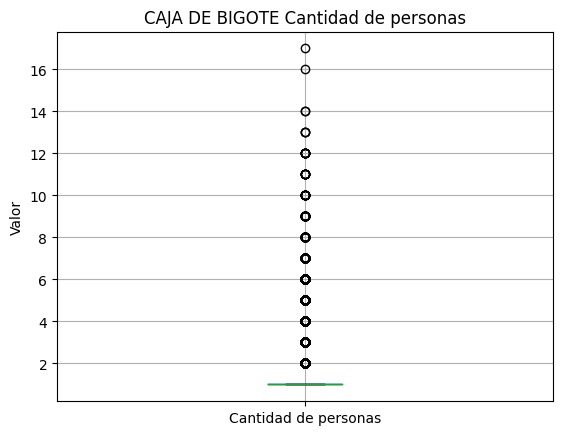

In [40]:
data_frame.boxplot(column='Cantidad de personas')
plt.title('CAJA DE BIGOTE Cantidad de personas')
plt.ylabel('Valor')
plt.show()

Partes del diagrama:

Caja: Representa el rango intercuartílico (IQR), que abarca el 50% de los datos. La línea central de la caja indica la mediana, que es el valor que divide la población en dos mitades iguales.

Bigotes: Se extienden desde la caja hasta los valores máximo y mínimo, excluyendo los valores atípicos.

Valores atípicos: Se representan como puntos individuales fuera de los bigotes.

Interpretación:

La mediana de la cantidad de personas es de 2.

El 50% de los datos se encuentran entre 1 y 3 personas.

El 75% de los datos se encuentran entre 0 y 4 personas.

El rango de la cantidad de personas abarca desde 0 hasta 10 personas.

Hay dos valores atípicos, uno por encima de 10 personas y otro por debajo de 0 personas.

Conclusiones:
La mayoría de las veces, hay entre 1 y 3 personas presentes.
Es poco común que haya más de 4 personas presentes.
Hay algunos casos excepcionales en los que hay más de 10 personas o ninguna persona presente.

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

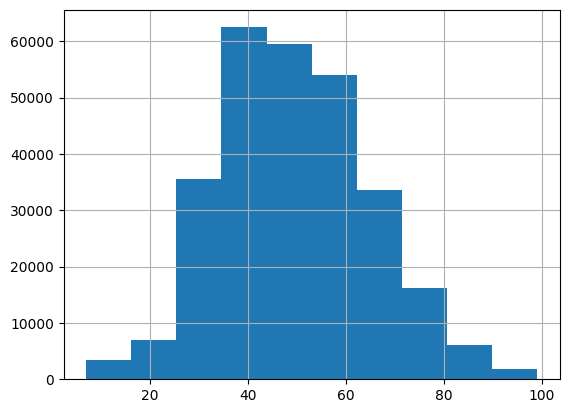

In [35]:
# data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].hist(bins=10)
# plt.show()

data_frame.loc[:, 'Edad (años)'].hist(bins=10)
plt.show()


Eje X: Edad (años)
Eje Y: Cantidad de personas

Forma de la distribución:

El histograma muestra una distribución asimétrica a la derecha. Esto significa que hay más personas en las edades más jóvenes que en las edades más avanzadas.
La mayoría de las personas se encuentran en el rango de 20 a 40 años.

Hay una disminución gradual en el número de personas a medida que aumenta la edad.

Hay un pico pequeño en el rango de 80 a 100 años, lo que podría indicar una población anciana significativa.
Valores específicos:

La cantidad máxima de personas se encuentra en la franja de 30 a 35 años.
Hay menos de 10.000 personas mayores de 80 años.
Hay más de 50.000 personas menores de 40 años.

Conclusiones:
La población representada en el histograma es joven en general.
Hay una disminución significativa en el número de personas a medida que aumenta la edad.
Hay una pequeña población anciana.

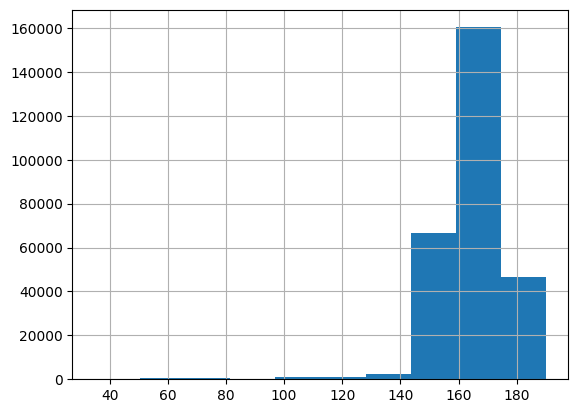

In [36]:
data_frame.loc[:, 'Estatura (CM)'].hist(bins=10)
plt.show()

Eje X: Estatura (CM)
Eje Y: Cantidad de personas

Forma de la distribución:

El histograma muestra una distribución normal o campana de Gauss. Esto significa que la mayoría de las personas se encuentran en la estatura promedio, y hay un número menor de personas que son más altas o más bajas que el promedio.

La mayor cantidad de personas se encuentra en el rango de 160 a 170 cm.

Hay una disminución gradual en el número de personas a medida que se aleja del rango de 160 a 170 cm.

Hay pocas personas que son menores de 140 cm o mayores de 190 cm.
Valores específicos:

La estatura promedio es de 165 cm.

La mayoría de las personas (más del 60%) se encuentran dentro de un rango de 10 cm alrededor de la estatura promedio (entre 155 cm y 175 cm).

Hay menos del 5% de las personas que son menores de 150 cm o mayores de 180 cm.

Conclusiones:
La población representada en el histograma tiene una estatura promedio.
La mayoría de las personas se encuentran dentro del rango normal de estatura.
Hay una pequeña cantidad de personas que son muy altas o muy bajas.

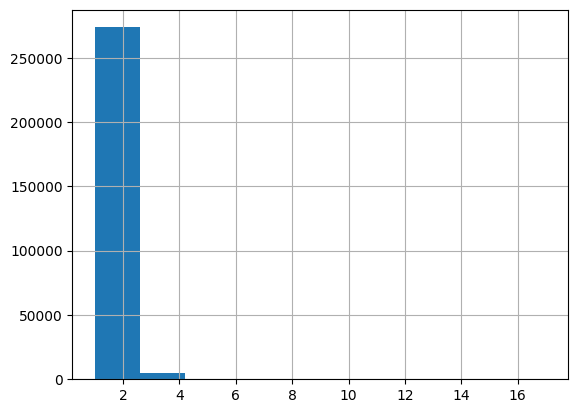

In [37]:
data_frame.loc[:, 'Cantidad de personas'].hist(bins=10)
plt.show()

Eje X: Cantidad de personas
Eje Y: Número total de personas

Forma de la distribución:

El histograma muestra una distribución uniforme. Esto significa que hay un número similar de personas en cada rango de cantidad de personas.

La mayor cantidad de personas se encuentra en el rango de 0 a 5 personas.

Hay una disminución gradual en el número de personas a medida que aumenta la cantidad de personas.

Hay pocas personas en grupos de más de 15 personas.

Valores específicos:

El rango más común es de 1 a 5 personas.

Hay menos de 10.000 personas en grupos de más de 15 personas.

Hay más de 50.000 personas en grupos de menos de 5 personas.

Conclusiones:
La población representada en el histograma se caracteriza por grupos pequeños.
La mayoría de las personas se encuentran en grupos de 1 a 5 personas.
Hay una pequeña cantidad de personas en grupos grandes.

## **3 CAMPOS DE VARIABLE CUALITATIVA**

PARA LOS SIGUIENTES CAMPOS:
1.   Área Conocimiento.
2.   Grupo edad.
3.   Género.

SE REALIZA:
1.   Moda
2.   Tabla de frecuencia absoluta y relativa
3.   Diagrama de barrase
4.   Diagrama de tortas
5.   Campos únicos


##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [18]:
print("Moda por columna:\n")
data_frame.loc[:, ['Área Conocimiento', 'Grupo edad', 'Género']].mode()

Moda por columna:



,Área Conocimiento,Grupo edad,Género
0,NO INDICA,ADULTO,FEMENINO


**La moda para el área de conocimiento es "NO INDICA".** Esto indica que en el conjunto de datos, la categoría "NO INDICA" es la que más frecuentemente aparece en la columna de área de conocimiento. Este resultado puede deberse a la falta de información o a una clasificación genérica para ciertas observaciones.
Grupo de Edad:

**La moda para el grupo de edad es "ADULTO".** Esto sugiere que la categoría "ADULTO" es la más comúnmente registrada en la columna de grupo de edad. Es importante destacar que este resultado proporciona información sobre la distribución de edades en el conjunto de datos, indicando que la mayoría de las observaciones probablemente corresponden a personas adultas.
Género:

**La moda para la columna de género es "FEMENINO".** Esto implica que el género más frecuente en el conjunto de datos es femenino. Es decir, hay más registros de personas identificadas como femeninas en comparación con otros géneros.

##### **FRECUENCIA ABSOLUTA**

In [19]:
print("\n Frecuencia absoluta Área Conocimiento: \n", data_frame['Área Conocimiento'].value_counts())
print("\n Frecuencia absoluta Grupo edad: \n", data_frame['Grupo edad'].value_counts())
print("\n Frecuencia absoluta Género: \n", data_frame['Género'].value_counts())


 Frecuencia absoluta Área Conocimiento: 
 NO INDICA                                       183155
NINGUNA                                          51171
ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES     12448
INGENIERÍA, ARQUITECTURA Y AFINES                10355
CIENCIAS SOCIALES Y HUMANAS                       7028
CIENCIAS DE LA SALUD                              6663
BELLAS ARTES                                      3181
CIENCIAS DE LA EDUCACIÓN                          2884
MATEMÁTICAS Y CIENCIAS NATURALES                  1394
AGRONOMÍA, VETERINARIA Y AFINES                    784
AGRONOMÍA, VETERINARIA Y ZOOTECNIA                 132
COCINA Y CULINARIA                                 127
AVIACIÓN                                            94
(NO REGISTRA)                                       73
Name: Área Conocimiento, dtype: int64

 Frecuencia absoluta Grupo edad: 
 ADULTO          188062
ADULTO MAYOR     72511
ADULTO JOVEN     14993
ADOLESCENTE       2723
INFANTE           120

**Frecuencia Absoluta de Área de Conocimiento:**
"NO INDICA" es la categoría más común con un total de 183,155 registros.
Le sigue "NINGUNA" con 51,171 registros.
Otras categorías tienen frecuencias menores, como "ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES" con 12,448 registros y "INGENIERÍA, ARQUITECTURA Y AFINES" con 10,355 registros.

**Frecuencia Absoluta de Grupo de Edad:**
"ADULTO" es la categoría más común con 188,062 registros.
Seguido por "ADULTO MAYOR" con 72,511 registros y "ADULTO JOVEN" con 14,993 registros.
Categorías como "ADOLESCENTE" y "INFANTE" tienen frecuencias menores con 2,723 y 1,200 registros, respectivamente.

**Frecuencia Absoluta de Género:**
"FEMENINO" es la categoría más común con 155,766 registros.
"MASCULINO" sigue con 123,489 registros.
Hay 234 registros donde el género es "DESCONOCIDO".

##### **FRECUENCIA RELATIVA**


In [20]:
print("\n Frecuencia relativa Área Conocimiento: \n", (100 * data_frame["Área Conocimiento"].value_counts() / len(data_frame["Área Conocimiento"])))
print("\n Frecuencia relativa Grupo edad: \n", (100 * data_frame["Grupo edad"].value_counts() / len(data_frame["Grupo edad"])))
print("\n Frecuencia relativa Género: \n", (100 * data_frame["Género"].value_counts() / len(data_frame["Género"])))


 Frecuencia relativa Área Conocimiento: 
 NO INDICA                                       65.532096
NINGUNA                                         18.308771
ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES     4.453843
INGENIERÍA, ARQUITECTURA Y AFINES                3.704976
CIENCIAS SOCIALES Y HUMANAS                      2.514589
CIENCIAS DE LA SALUD                             2.383994
BELLAS ARTES                                     1.138149
CIENCIAS DE LA EDUCACIÓN                         1.031883
MATEMÁTICAS Y CIENCIAS NATURALES                 0.498767
AGRONOMÍA, VETERINARIA Y AFINES                  0.280512
AGRONOMÍA, VETERINARIA Y ZOOTECNIA               0.047229
COCINA Y CULINARIA                               0.045440
AVIACIÓN                                         0.033633
(NO REGISTRA)                                    0.026119
Name: Área Conocimiento, dtype: float64

 Frecuencia relativa Grupo edad: 
 ADULTO          67.287800
ADULTO MAYOR    25.944134
ADULTO JOVEN     

**Frecuencia Relativa de Área de Conocimiento:**
"NO INDICA" representa aproximadamente el 65.53% de todos los registros en esta columna.
La categoría "NINGUNA" comprende alrededor del 18.31%.
Las otras categorías tienen porcentajes más bajos, como "ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES" con aproximadamente el 4.45% y "INGENIERÍA, ARQUITECTURA Y AFINES" con cerca del 3.70%.

**Frecuencia Relativa de Grupo de Edad:**
"ADULTO" abarca alrededor del 67.29% de todos los registros en esta columna.
"ADULTO MAYOR" constituye alrededor del 25.94%.
"ADULTO JOVEN" representa aproximadamente el 5.36%.
Las categorías menos representadas son "ADOLESCENTE" con cerca del 0.97% y "INFANTE" con aproximadamente el 0.43%.

**Frecuencia Relativa de Género:**
"FEMENINO" abarca aproximadamente el 55.73% de todos los registros en esta columna.
"MASCULINO" comprende alrededor del 44.18%.
La categoría "DESCONOCIDO" representa una proporción muy pequeña, aproximadamente el 0.08%.

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Área Conocimiento): 
 Axes(0.125,0.11;0.775x0.77)


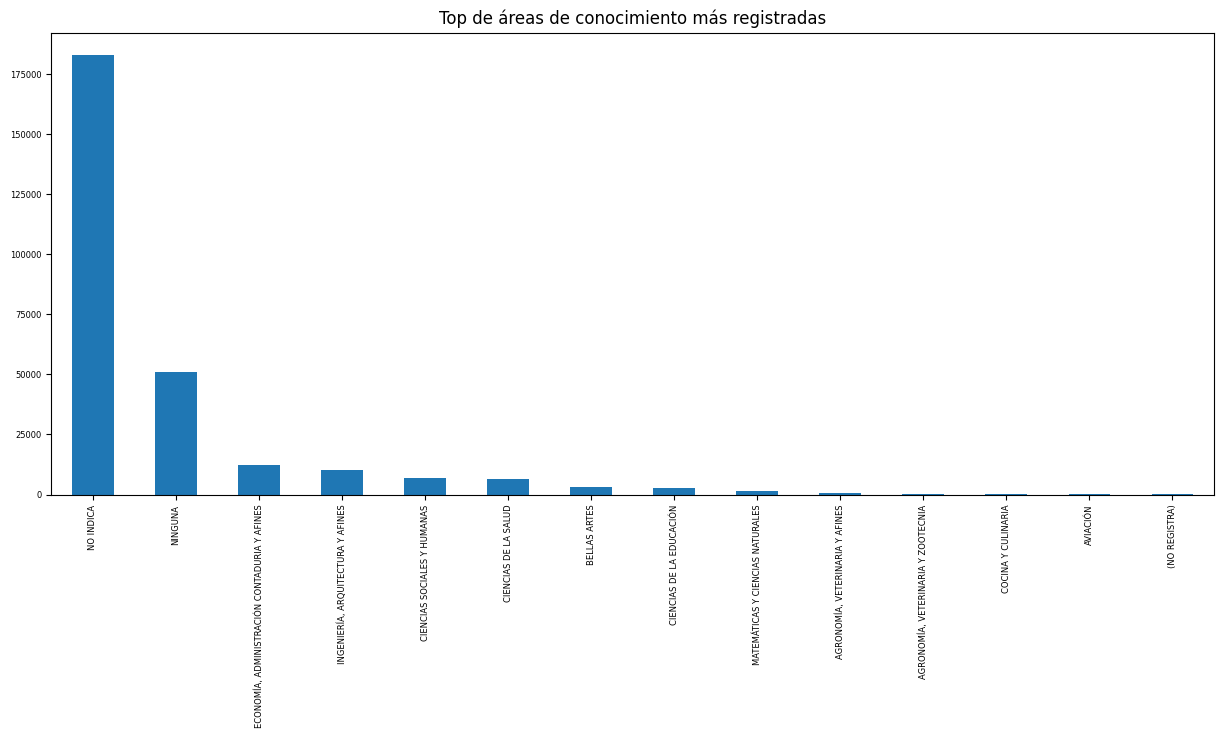

In [21]:
print("\n GRAFICO DE BARRAS (Área Conocimiento): \n", data_frame["Área Conocimiento"].value_counts().plot(kind="bar",figsize=(15,6),title="Top de áreas de conocimiento más registradas", fontsize=6))


 GRAFICO DE BARRAS (Grupo edad): 
 Axes(0.125,0.11;0.775x0.77)


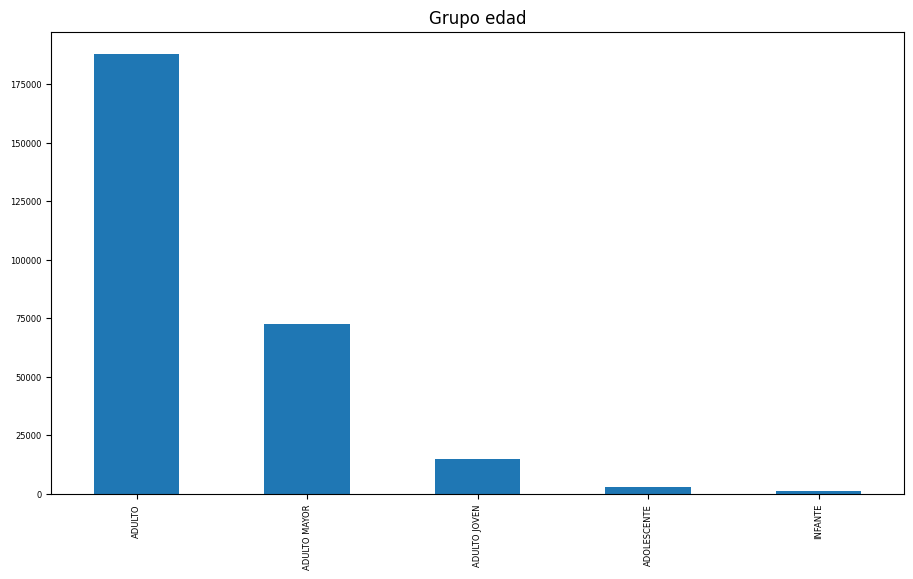

In [22]:
print("\n GRAFICO DE BARRAS (Grupo edad): \n", data_frame["Grupo edad"].value_counts().plot(kind="bar",figsize=(11,6),title="Grupo edad", fontsize=6))


 GRAFICO DE BARRAS (Género): 
 Axes(0.125,0.11;0.775x0.77)


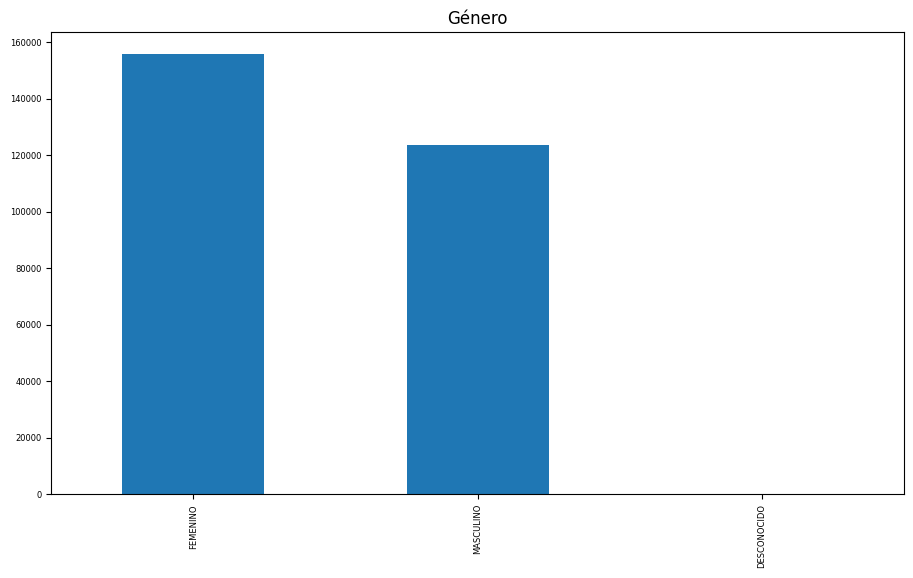

In [23]:
print("\n GRAFICO DE BARRAS (Género): \n", data_frame["Género"].value_counts().plot(kind="bar",figsize=(11,6),title="Género", fontsize=6))

##### **GRAFICO DE TORTA**

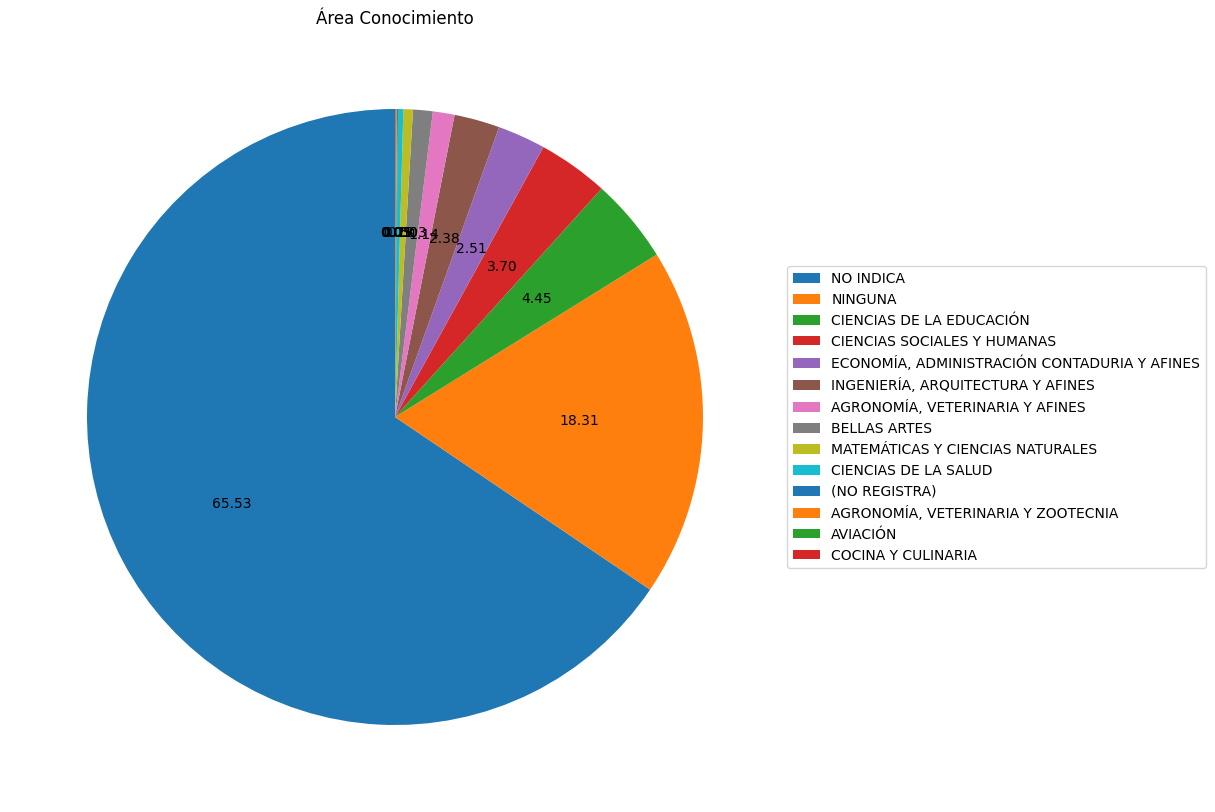

In [24]:
# data_frame["País"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title= "País" )

# Crear el gráfico circular
plt.figure(figsize=(12, 10))
plt.pie(data_frame["Área Conocimiento"].value_counts(), labels=None, autopct="%.2f", startangle=90)
plt.legend(data_frame['Área Conocimiento'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Área Conocimiento')
plt.show()

<Axes: title={'center': 'Grupo edad'}, ylabel='Grupo edad'>

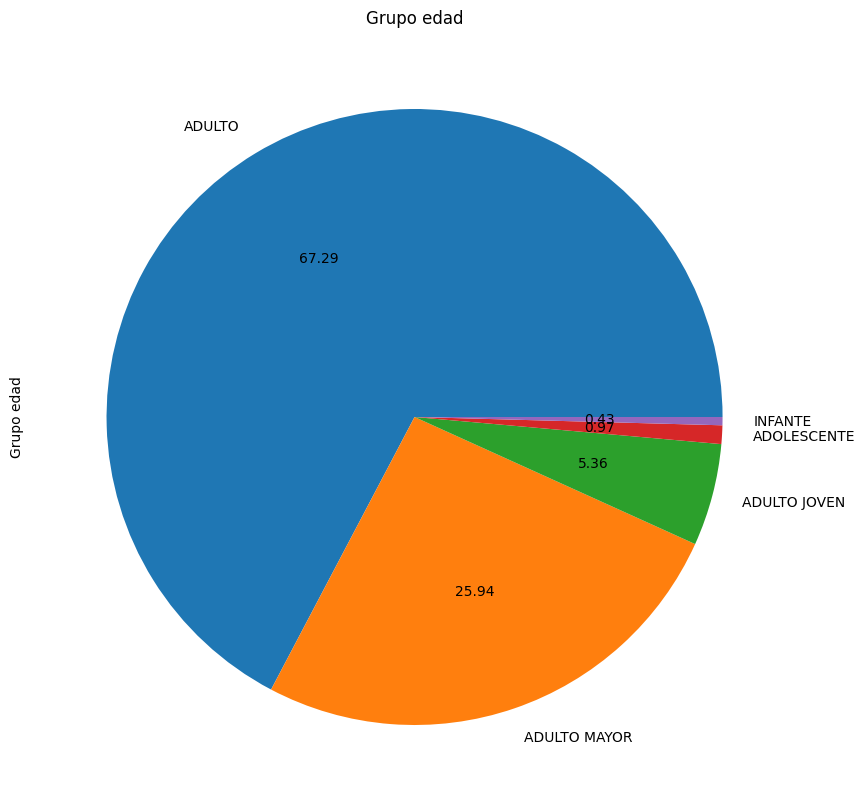

In [25]:
data_frame["Grupo edad"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title="Grupo edad" )

<Axes: title={'center': 'Género'}, ylabel='Género'>

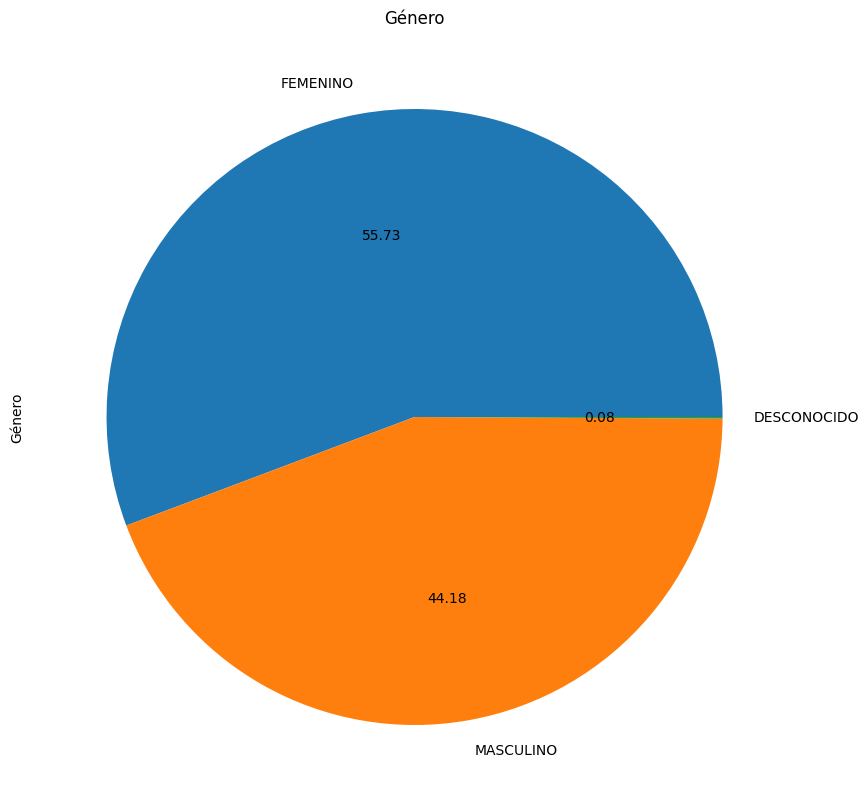

In [26]:
data_frame["Género"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title= "Género" )

##### **CAMPOS UNICOS**

In [27]:
data_frame['Área Conocimiento'].unique()

array(['NO INDICA', 'NINGUNA', 'CIENCIAS DE LA EDUCACIÓN',
       'CIENCIAS SOCIALES Y HUMANAS',
       'ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES',
       'INGENIERÍA, ARQUITECTURA Y AFINES',
       'AGRONOMÍA, VETERINARIA Y AFINES', 'BELLAS ARTES',
       'MATEMÁTICAS Y CIENCIAS NATURALES', 'CIENCIAS DE LA SALUD',
       '(NO REGISTRA)', 'AGRONOMÍA, VETERINARIA Y ZOOTECNIA', 'AVIACIÓN',
       'COCINA Y CULINARIA'], dtype=object)

*   'NO INDICA'
*   'NINGUNA'
*   'CIENCIAS DE LA EDUCACIÓN'
*   'CIENCIAS SOCIALES Y HUMANAS'
*   'ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES'
*   'INGENIERÍA, ARQUITECTURA Y AFINES'
*   'AGRONOMÍA, VETERINARIA Y AFINES'
*   'BELLAS ARTES'
*   'MATEMÁTICAS Y CIENCIAS NATURALES'
*   'CIENCIAS DE LA SALUD'
*   '(NO REGISTRA)'
*   'AGRONOMÍA, VETERINARIA Y ZOOTECNIA'
*   'AVIACIÓN'
*   'COCINA Y CULINARIA'

Estos valores representan las diferentes áreas de conocimiento o categorías en las que se pueden clasificar los registros en la columna "Área de Conocimiento". Cada valor único indica un área específica de conocimiento o una categoría relacionada con la educación, las ciencias, las artes, entre otros campos.

In [28]:
data_frame['Grupo edad'].unique()

array(['ADULTO', 'ADULTO MAYOR', 'ADULTO JOVEN', 'ADOLESCENTE', 'INFANTE'],
      dtype=object)

*   'ADULTO'
*   'ADULTO MAYOR'
*   'ADULTO JOVEN'
*   'ADOLESCENTE'
*   'INFANTE'

Cada uno de estos valores representa un grupo específico de edad y categoriza a las personas en el conjunto de datos en función de su edad. Los grupos de edad incluyen adultos, adultos mayores, adultos jóvenes, adolescentes e infantes, cubriendo un rango amplio de edades y etapas de la vida.

In [29]:
data_frame['Género'].unique()

array(['FEMENINO', 'MASCULINO', 'DESCONOCIDO'], dtype=object)

*   'FEMENINO'
*   'MASCULINO'
*   'DESCONOCIDO'

Cada uno de estos valores representa una categoría específica de género y clasifica a las personas en el conjunto de datos en función de su identidad de género. Las categorías incluyen femenino, masculino y desconocido, reflejando la diversidad de género presente en los datos.